In [2]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn.ensemble as skle
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import (train_test_split, TimeSeriesSplit, KFold, StratifiedKFold,
                                     GroupKFold, StratifiedGroupKFold)

In [3]:
houses = pd.read_excel('real_estate_inventory.xlsx')

## **Exploratory data analysis (EDA)**

In [4]:
houses.head()

,date,type,year_built,bathrooms,bedrooms,state,price,hvac,hardwood_floors,fireplace,squareft,garage,acreage,purchased
0,2021-06-23,condo,2005,2,3,NY,212948,1,1,1,1584,0,1.95,1
1,2022-03-20,condo,2001,1,2,NY,153555,1,0,0,1704,0,2.50,0
2,2021-04-24,townhome,2019,2,3,NJ,206549,1,1,1,2464,1,0.52,0
3,2021-10-31,condo,2019,2,4,PA,330239,1,1,0,1640,0,1.50,1
4,2022-02-09,single family,2000,1,2,NY,157490,1,0,0,2390,0,1.54,1


In [5]:
houses.isna().sum()

date               0
type               0
year_built         0
bathrooms          0
bedrooms           0
state              0
price              0
hvac               0
hardwood_floors    0
fireplace          0
squareft           0
garage             0
acreage            0
purchased          0
dtype: int64

In [6]:
houses.describe()

,year_built,bathrooms,bedrooms,price,hvac,hardwood_floors,fireplace,squareft,garage,acreage,purchased
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2006.495200,1.499200,2.516400,201313.088600,0.602400,0.702200,0.483800,1755.008400,0.49980,2.743238,0.498000
std,10.824297,0.500049,1.119099,80966.691576,0.489451,0.457337,0.499787,436.764217,0.50005,1.324089,0.500046
min,1985.000000,1.000000,1.000000,106785.000000,0.000000,0.000000,0.000000,1000.000000,0.00000,0.500000,0.000000
25%,1998.000000,1.000000,2.000000,150254.250000,0.000000,0.000000,0.000000,1368.000000,0.00000,1.570000,0.000000
50%,2005.000000,1.000000,3.000000,199386.500000,1.000000,1.000000,0.000000,1753.000000,0.00000,2.720000,0.000000
75%,2016.000000,2.000000,4.000000,311833.500000,1.000000,1.000000,1.000000,2142.000000,1.00000,3.902500,1.000000
max,2020.000000,2.000000,4.000000,352219.000000,1.000000,1.000000,1.000000,2500.000000,1.00000,5.000000,1.000000


In [7]:
houses.shape

(5000, 14)

In [8]:
typeh = houses['type'].groupby(houses['type']).count()

In [9]:
typeh

type
condo            1705
single family    1639
townhome         1656
Name: type, dtype: int64

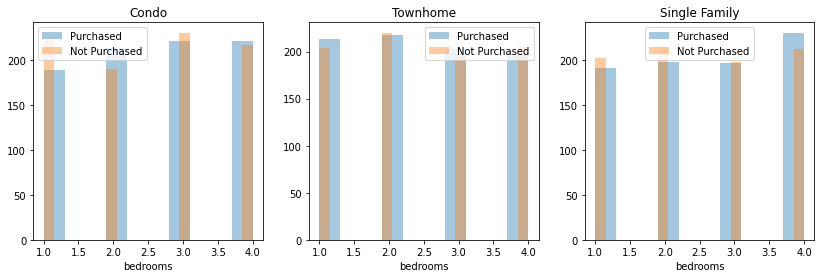

In [11]:
Purchased = 'Purchased'
Not_Purchased = 'Not Purchased'
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(14, 4))
Condo = houses[houses['type']=='condo']
Townhome = houses[houses['type']=='townhome']
SingleFamily= houses[houses['type']=='single family']
ax = sns.distplot(Condo[Condo['purchased']==1].bedrooms.dropna(), bins=10, label = Purchased, ax = axes[0], kde =False)
ax = sns.distplot(Condo[Condo['purchased']==0].bedrooms.dropna(), bins=20, label = Not_Purchased, ax = axes[0], kde =False)
ax.legend()
_ = ax.set_title('Condo')
ax = sns.distplot(Townhome[Townhome['purchased']==1].bedrooms.dropna(), bins=10, label = Purchased, ax = axes[1], kde =False)
ax = sns.distplot(Townhome[Townhome['purchased']==0].bedrooms.dropna(), bins=20, label = Not_Purchased, ax = axes[1], kde =False)
ax.legend()
_ = ax.set_title('Townhome')
ax = sns.distplot(SingleFamily[SingleFamily['purchased']==1].bedrooms.dropna(), bins=10, label = Purchased, ax = axes[2], kde = False)
ax = sns.distplot(SingleFamily[SingleFamily['purchased']==0].bedrooms.dropna(), bins=20, label = Not_Purchased, ax = axes[2], kde = False)
ax.legend()
_ = ax.set_title('Single Family');

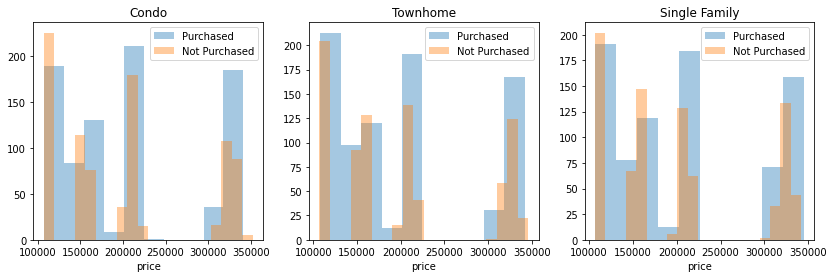

In [12]:
Purchased = 'Purchased'
Not_Purchased = 'Not Purchased'
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(14, 4))
Condo = houses[houses['type']=='condo']
Townhome = houses[houses['type']=='townhome']
SingleFamily= houses[houses['type']=='single family']
ax = sns.distplot(Condo[Condo['purchased']==1].price.dropna(), bins=10, label = Purchased, ax = axes[0], kde =False)
ax = sns.distplot(Condo[Condo['purchased']==0].price.dropna(), bins=20, label = Not_Purchased, ax = axes[0], kde =False)
ax.legend()
_ = ax.set_title('Condo')
ax = sns.distplot(Townhome[Townhome['purchased']==1].price.dropna(), bins=10, label = Purchased, ax = axes[1], kde =False)
ax = sns.distplot(Townhome[Townhome['purchased']==0].price.dropna(), bins=20, label = Not_Purchased, ax = axes[1], kde =False)
ax.legend()
_ = ax.set_title('Townhome')
ax = sns.distplot(SingleFamily[SingleFamily['purchased']==1].price.dropna(), bins=10, label = Purchased, ax = axes[2], kde = False)
ax = sns.distplot(SingleFamily[SingleFamily['purchased']==0].price.dropna(), bins=20, label = Not_Purchased, ax = axes[2], kde = False)
ax.legend()
_ = ax.set_title('Single Family');

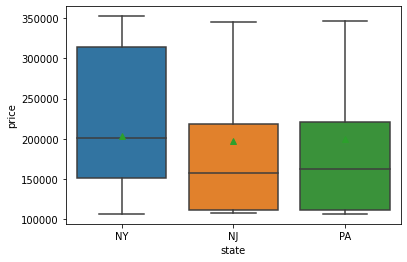

In [23]:
sns.boxplot(x='state', y='price', data=houses, showmeans=True);

In [21]:
meanstates = houses.groupby('state')['price'].mean()

In [22]:
meanstates

state
NJ    196802.945841
NY    203245.095392
PA    199532.812317
Name: price, dtype: float64

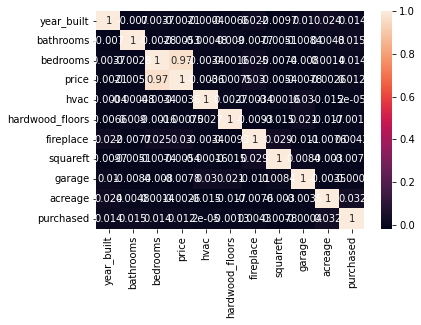

In [ ]:
corrMatrix = houses.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
corrMatrix

,year_built,bathrooms,bedrooms,price,hvac,hardwood_floors,fireplace,squareft,garage,acreage,purchased
year_built,1.000000,-0.007023,0.003706,-0.002125,-0.000398,-0.006613,0.021931,-0.009676,0.010108,0.023812,0.014338
bathrooms,-0.007023,1.000000,-0.002836,-0.005256,-0.000483,0.009017,-0.007656,-0.005140,-0.008401,0.004827,0.015194
bedrooms,0.003706,-0.002836,1.000000,0.972183,-0.003432,-0.001595,0.024617,-0.007360,-0.008037,0.001390,0.014000
price,-0.002125,-0.005256,0.972183,1.000000,-0.003618,-0.000748,0.030148,-0.005369,-0.007763,-0.002558,0.011971
hvac,-0.000398,-0.000483,-0.003432,-0.003618,1.000000,0.002657,-0.003439,-0.000159,0.029916,-0.014632,0.000020
hardwood_floors,-0.006613,0.009017,-0.001595,-0.000748,0.002657,1.000000,-0.009296,-0.014939,0.021170,-0.017214,-0.001293
fireplace,0.021931,-0.007656,0.024617,0.030148,-0.003439,-0.009296,1.000000,0.029438,-0.011219,-0.007588,0.004273
squareft,-0.009676,-0.005140,-0.007360,-0.005369,-0.000159,-0.014939,0.029438,1.000000,0.008427,-0.002967,-0.007764
garage,0.010108,-0.008401,-0.008037,-0.007763,0.029916,0.021170,-0.011219,0.008427,1.000000,-0.003454,-0.000402
acreage,0.023812,0.004827,0.001390,-0.002558,-0.014632,-0.017214,-0.007588,-0.002967,-0.003454,1.000000,0.032149


### **Data preparation**

In [ ]:
#X = houses[["type","price","bedrooms", "squareft","garage"]]
#y = houses["purchased"]
#X_test = houses[["type","price","bedrooms", "squareft", "garage"]]

In [ ]:
#X = houses[["type","year_built","price","hvac","fireplace","price","garage","acreage"]]
#y = houses["purchased"]
#X_test = houses[["type","year_built","price","hvac","fireplace","price","garage","acreage"]]

In [ ]:
#X = houses[["type","year_built","price","fireplace","acreage"]]
#y = houses["purchased"]
#X_test = houses[["type","year_built","price","fireplace","acreage"]]

In [ ]:
X = houses.drop(['purchased','date'],axis=1)
y = houses['purchased']
X_test = houses.drop(['purchased','date'],axis=1)
Groups = houses[['purchased']]

In [ ]:
X,y,Groups

(               type  year_built  bathrooms  bedrooms state   price  hvac  \
 0             condo        2005          2         3    NY  212948     1   
 1             condo        2001          1         2    NY  153555     1   
 2          townhome        2019          2         3    NJ  206549     1   
 3             condo        2019          2         4    PA  330239     1   
 4     single family        2000          1         2    NY  157490     1   
 ...             ...         ...        ...       ...   ...     ...   ...   
 4995          condo        2016          2         3    NY  208058     1   
 4996       townhome        1998          1         3    PA  204380     1   
 4997          condo        2020          1         3    PA  204848     0   
 4998       townhome        2019          1         1    NY  111867     1   
 4999       townhome        2015          2         3    NY  207550     1   
 
       hardwood_floors  fireplace  squareft  garage  acreage  
 0         

In [ ]:
typeh2 = X['type'].groupby(X['type']).count()

In [ ]:
typeh2

type
condo            1705
single family    1639
townhome         1656
Name: type, dtype: int64

In [ ]:
X['type'] = pd.factorize(X['type'])[0];

In [ ]:
X['state'] = pd.factorize(X['state'])[0];

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0, stratify=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
X_train

,type,year_built,bathrooms,bedrooms,state,price,hvac,hardwood_floors,fireplace,squareft,garage,acreage
3064,0,2005,1,1,0,110344,1,1,1,2130,0,4.29
1565,0,2001,1,3,2,216515,0,1,1,1291,0,0.75
3391,2,2000,2,1,0,110450,1,0,0,1632,0,3.30
4588,2,1998,1,2,2,155983,1,0,0,1115,0,0.90
4642,2,2005,1,2,2,152091,1,0,0,2244,0,3.42
...,...,...,...,...,...,...,...,...,...,...,...,...
970,1,2001,1,2,0,151882,0,1,1,2489,0,2.26
4817,2,2000,2,1,0,111147,1,1,0,2062,1,0.51
4695,2,2001,2,3,0,206780,0,1,1,1121,1,4.93
3908,1,2020,1,2,0,156118,0,0,0,1490,0,0.74


In [ ]:
typeh3 = X['type'].groupby(X['type']).count()

In [ ]:
typeh3

type
0    1705
1    1656
2    1639
Name: type, dtype: int64

Condo = 0

townhome = 1

single family = 2

In [ ]:
len(X_test)

1000

### **Random Forest**

First model creation

In [ ]:
modelr = RandomForestClassifier(n_estimators=50, random_state=0)
modelr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [ ]:
modelr.score(X_test,y_test)

0.522

In [ ]:
y_predicted = modelr.predict(X_test)

In [ ]:
y_predicted

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,

In [ ]:
conm1 = confusion_matrix(y_test, y_predicted)

In [ ]:
conm1

array([[274, 228],
       [250, 248]])

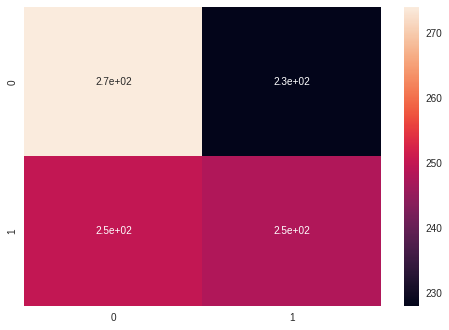

In [ ]:
sns.heatmap(conm1, annot=True);

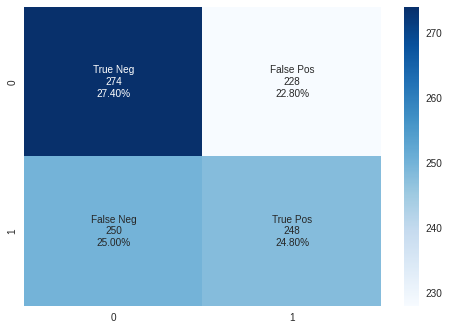

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                conm1.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     conm1.flatten()/np.sum(conm1)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conm1, annot=labels, fmt='', cmap='Blues');

Second random forest classification model

In [ ]:
model_r = RandomForestClassifier(random_state=0)
model_r.fit(X_train,y_train)
yhat = model_r.predict(X_test)
print("Accuracy for training data : ",accuracy_score(y_test,yhat))

Accuracy for training data :  0.507


In [ ]:
y_predicted = model_r.predict(X_test)

In [ ]:
conm2 = confusion_matrix(y_test, y_predicted)

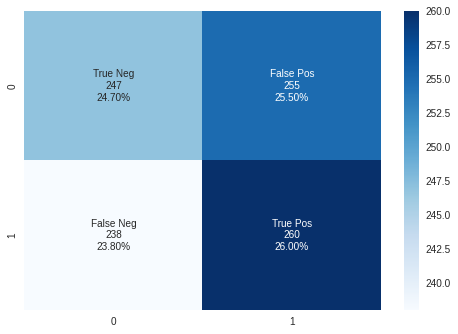

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                conm2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     conm2.flatten()/np.sum(conm2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conm2, annot=labels, fmt='', cmap='Blues');

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_predicted))
print(classification_report(y_test,y_predicted))
print(accuracy_score(y_test, y_predicted))

[[247 255]
 [238 260]]
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       502
           1       0.50      0.52      0.51       498

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.51      0.51      0.51      1000

0.507


### **Naive Bayes**

In [ ]:
model_NB = GaussianNB()
model_NB.fit(X_train,y_train)
y_hat = model_NB.predict(X_test)
print("Accuracy for training data : ",accuracy_score(y_test,y_hat))

Accuracy for training data :  0.514


In [ ]:
y_predictednb = model_NB.predict(X_test)

In [ ]:
conm_NB = confusion_matrix(y_test, y_predictednb)

In [ ]:
conm_NB

array([[254, 248],
       [238, 260]])

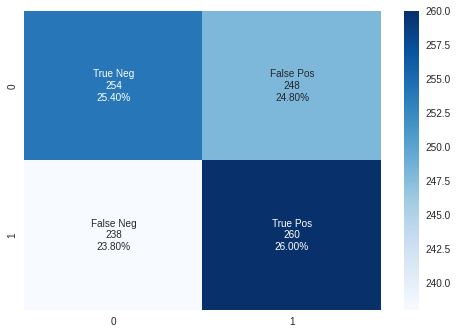

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                conm_NB.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     conm_NB.flatten()/np.sum(conm2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conm_NB, annot=labels, fmt='', cmap='Blues');

### **Support Vector Machine (SVM)**

In [ ]:
model_svm = SVC(gamma='auto')
model_svm.fit(X_train,y_train)
yhat = model_svm.predict(X_test)
print("Accuracy for training data : ",accuracy_score(y_test,y_hat))
model_SVM = SVC(gamma='auto')
model_SVM.fit(X,y)
pred_svm = model_SVM.predict(X_test)

Accuracy for training data :  0.514


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, plot_importance 

In [ ]:
model_rf = RandomForestClassifier()
model_et = ExtraTreesClassifier()
model_bc = BaggingClassifier()
model_ada = AdaBoostClassifier()
model_dt = DecisionTreeClassifier()
model_xg = XGBClassifier()
model_lr = LogisticRegression()
model_svm = SVC()
model_NB = GaussianNB()

In [ ]:
npX = np.array(X).copy()
npy = np.array(y).copy()

In [ ]:
Classifiers = ['RandomForest','ExtraTrees','Bagging','AdaBoost','DecisionTree','XGBoost','LogisticRegression','SVM','NaiveBayes']
scores = []
models = [model_rf, model_et, model_bc, model_ada, model_dt, model_xg, model_lr, model_svm, model_NB]
for model in models:
    score = cross_val_score(model, npX, npy, scoring = 'accuracy', cv = 10, n_jobs = -1).mean()
    scores.append(score)

In [ ]:
model_compare = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score',
             ascending = False)

In [ ]:
model_compare

,score
NaiveBayes,0.5116
DecisionTree,0.5068
LogisticRegression,0.5056
SVM,0.5044
ExtraTrees,0.4976
XGBoost,0.4950
AdaBoost,0.4944
RandomForest,0.4900
Bagging,0.4896


In [ ]:
# Create a sample model with a specific solver for the ROC Curve
clf = LogisticRegression(solver="liblinear", random_state=0).fit(npX, npy)
# Display area under the curve score
roc_auc_score(npy, clf.predict_proba(npX)[:, 1])

0.5262295396726347

In [ ]:
fpr1, tpr1, thresh1 = roc_curve(npy, clf.predict_proba(npX)[:,1], pos_label=1)

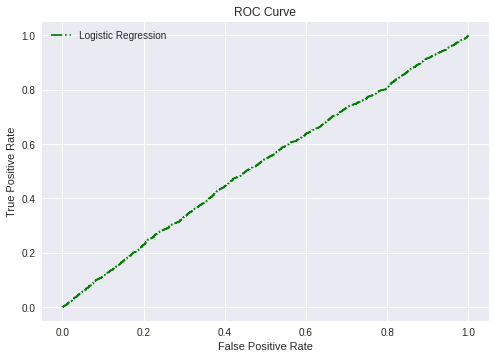

In [ ]:
# Display ROC Curve
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='-.',color='green', label='Logistic Regression')

# title
plt.title('ROC Curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### **Improving the Random Forest model**

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)

5

In [ ]:
k_fold = KFold(n_splits=5)
for indices_train, indices_test in k_fold.split(X):
    print(indices_train, indices_test)

[1000 1001 1002 ... 4997 4998 4999] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23

In [ ]:
import lightgbm as lgb

In [ ]:
rfc1 = lgb.LGBMClassifier(n_estimators=10)
rfc1.fit(X_train, y_train)

LGBMClassifier(n_estimators=10)

In [ ]:
rfc1.score(X_test, y_test)

0.518

In [ ]:
pred = rfc1.predict(X)
pred_prob = rfc1.predict_proba(X)[:, 1]

In [ ]:
pred_prob

array([0.53626378, 0.522813  , 0.44930206, ..., 0.50919645, 0.45049721,
       0.50164271])

In [ ]:
acc_score = accuracy_score(y,pred)
auc_score = roc_auc_score(y, pred_prob)

In [ ]:
acc_score

0.656

In [ ]:
auc_score

0.7128787660602569

In [ ]:
modelrnew = RandomForestClassifier(n_estimators=50, random_state=0)
modelrnew.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [ ]:
modelrnew.score(X_test,y_test)

0.522

Using the entire X value for prediction helped improving the model.

In [ ]:
pred2 = modelrnew.predict(X)
pred_prob2 = modelrnew.predict_proba(X)[:, 1]

In [ ]:
acc_score = accuracy_score(y,pred2)
auc_score = roc_auc_score(y, pred_prob2)

In [ ]:
acc_score

0.9044

In [ ]:
auc_score

0.9773977983647738

In [ ]:
fpr12, tpr12, thresh12 = roc_curve(npy, modelr.predict_proba(X)[:, 1], pos_label=1)

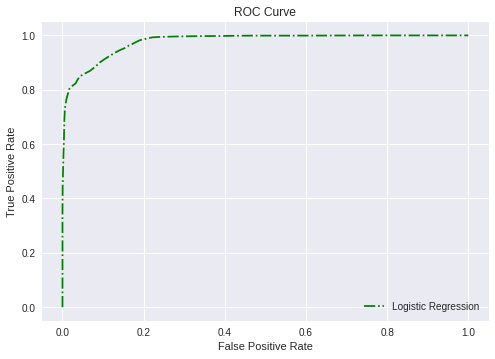

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr12, tpr12, linestyle='-.',color='green', label='Logistic Regression')

# title
plt.title('ROC Curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();
